In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from caveclient import CAVEclient
afont = {'fontname':'Arial'}
client = CAVEclient('minnie65_phase3_v1')
from datetime import datetime, timezone

In [13]:
settime = datetime(2022, 9, 20, 4, 0, 0, 0, tzinfo=timezone.utc)
df_ids_pred_met = pd.read_csv("EM_MC_Predicted_MET_Labels_11_18_22_v1_gr55prob.csv")
pre_id_mc = df_ids_pred_met["id"]
print (df_ids_pred_met)
##big batch
df2 = client.materialize.synapse_query(pre_ids= pre_id_mc, timestamp = settime)
md3 = client.materialize.query_table('allen_subclass_type_svm_v0', timestamp = settime)
soma_counts = md3['pt_root_id'].value_counts().rename_axis('pt_root_id').reset_index(name ='no_of_somas')
dfm = pd.merge(df2, md3, left_on = 'post_pt_root_id', right_on ='pt_root_id', how = 'right')
singlesomas = soma_counts.loc[soma_counts['no_of_somas'] == 1]
single_soma_merge = pd.merge(md3, singlesomas, left_on = 'pt_root_id', right_on = 'pt_root_id', how = 'inner')
dfm_somas = pd.merge(df2, single_soma_merge, left_on = 'post_pt_root_id', right_on = 'pt_root_id', how = 'inner')


    Unnamed: 0                  id predicted_MET-type Label  probability Area
0            0  864691135013417622                Sst-MET-4        1.000   V1
1            8  864691135467660940                Sst-MET-4        1.000   V1
2           11  864691135699487522                Sst-MET-8        1.000   V1
3           14  864691135925834510                Sst-MET-8        1.000   V1
4           19  864691136118647832                Sst-MET-4        1.000   V1
5            9  864691135544588584                Sst-MET-8        0.998   V1
6           10  864691135577202181                Sst-MET-4        0.998   V1
7            6  864691135374222153                Sst-MET-6        0.996   V1
8           18  864691136116457636                Sst-MET-6        0.996   V1
9            1  864691135058985115                Sst-MET-6        0.994   V1
10          12  864691135754152141                Sst-MET-5        0.990   V1
11          16  864691135988665856                Sst-MET-6     

In [5]:
met8_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_MET-type Label'] == "Sst-MET-8"]
met8_id = met8_pred["id"]

met4_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_MET-type Label'] == "Sst-MET-4"]
met4_id = met4_pred["id"]

met6_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_MET-type Label'] == "Sst-MET-6"]
met6_id = met6_pred["id"]


          pre_pt_root_id     post_pt_root_id cell_type  no_of_somas  size  \
7248  864691135699487522  864691136134450571       23P            1  1924   
7697  864691135699487522  864691136089182263       23P            1  3764   
6521  864691135699487522  864691136680620662       NGC            1  2952   
3194  864691135699487522  864691135360351559       23P            1  7072   
6900  864691135699487522  864691136422871087       23P            1   396   
29    864691135699487522  864691135012889750       23P            1  2192   
7686  864691135699487522  864691136732227190       BPC            1  5832   
7727  864691135699487522  864691135516230355       23P            1   372   
9328  864691135699487522  864691135416073402       23P            1  5368   
5521  864691135699487522  864691135888777097        4P            1  3012   

           y  counts  
7248  24.368       1  
7697  25.360       4  
6521  25.488       5  
3194  25.648       1  
6900  28.296       3  
29    33.544  

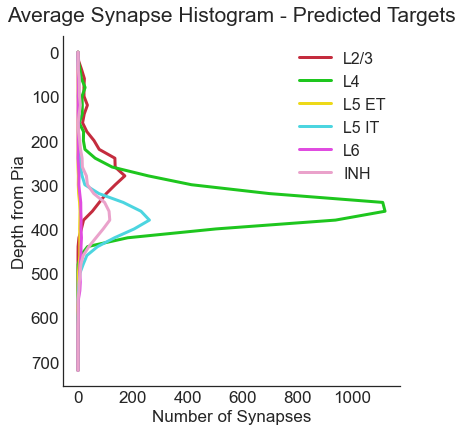

In [6]:
###Pred Met 8 & 6 avg horizontal histo predicted targets
plt.rcParams["figure.figsize"] = (1,10)

newall = np.zeros(37, int)
new23 = np.zeros(37, int)
new4 = np.zeros(37, int) 
newit = np.zeros(37, int) 
newpt = np.zeros(37, int)
new6 = np.zeros(37, int) 
newinh = np.zeros(37, int)

for i in met8_id:  

    ###Auto calls
    single_cell = dfm_somas.loc[dfm_somas['pre_pt_root_id'] == i].copy()
    single_cell['y'] = single_cell['ctr_pt_position'].map(lambda x: x[1])
    single_cell['y'] = (single_cell['y']*.004)-300
    single_cell_sub = single_cell[["pre_pt_root_id","post_pt_root_id", "cell_type", "no_of_somas", "size", "y"]]
 
      
    converge = single_cell['post_pt_root_id'].value_counts().rename_axis('post_pt_root_id').reset_index(name ='counts')
    converge_call=pd.merge(single_cell_sub, converge, left_on = 'post_pt_root_id', right_on ='post_pt_root_id', how = 'outer')
    sorted_converge = converge_call.sort_values(["y"], ascending = True)
#     print (sorted_converge.head(10))
    converge_call23 = converge_call.loc[converge_call['cell_type'] == '23P']
    converge_call4 = converge_call.loc[converge_call['cell_type'] == '4P']
    converge_callit = converge_call.loc[converge_call['cell_type'] == '5P-IT']
    converge_callpt = converge_call.loc[converge_call['cell_type'] == '5P-PT']
    converge_call6 = converge_call.loc[(converge_call['cell_type'] == '6P-CT') | (converge_call['cell_type'] == '6P-IT')]
    converge_callinh = converge_call.loc[(converge_call['cell_type'] == 'BC') | (converge_call['cell_type'] == 'BPC') | (converge_call['cell_type'] == 'MC')| (converge_call['cell_type'] == 'NGC')]
       
#     print (converge_call23.head())
    alltargets = converge_call['y'].to_numpy()
    np23 = converge_call23['y'].to_numpy()
    np4 = converge_call4['y'].to_numpy()
    npit = converge_callit['y'].to_numpy()
    nppt = converge_callpt['y'].to_numpy()
    np6 = converge_call6['y'].to_numpy()
    npinh = converge_callinh['y'].to_numpy()
    
    
    historange = np.arange(0,750,20)
    histall, bins = np.histogram(alltargets, bins = historange)
    hist23, bins = np.histogram(np23, bins = historange)
    hist4, bins4 = np.histogram(np4, bins = historange)
    histit, bins4 = np.histogram(npit, bins = historange)
    histpt, bins4 = np.histogram(nppt, bins = historange)
    hist6, bins4 = np.histogram(np6, bins = historange)
    histinh, bins4 = np.histogram(npinh, bins = historange)
    
    newall = np.vstack((histall, newall))
    new23 = np.vstack((hist23, new23))
    new4 = np.vstack((hist4, new4))
    newit = np.vstack((histit, newit))
    newpt = np.vstack((histpt, newpt))
    new6 = np.vstack((hist6, new6))
    newinh = np.vstack((histinh, newinh))


##remove empty row for met8
newall = np.delete(newall, 3, 0)
new23 = np.delete(new23, 3, 0)
new4 = np.delete(new4, 3, 0)
newit = np.delete(newit, 3, 0)
newpt = np.delete(newpt, 3, 0)
new6 = np.delete(new6, 3, 0)
newinh = np.delete(newinh, 3, 0)

### calc avg hist

avgall = np.mean(newall, axis = 0)
avg23 = np.mean(new23, axis = 0)
avg4 = np.mean(new4, axis = 0)
avgit = np.mean(newit, axis = 0)
avgpt = np.mean(newpt, axis = 0)
avg6 = np.mean(new6, axis = 0)
avginh = np.mean(newinh, axis = 0)
bins = np.arange(0, 750, 20)

with plt.style.context('seaborn-white', after_reset = True):
    fig, ax = plt.subplots()
    fig.set_figwidth(5.7)
    fig.set_figheight(6.1)
    afont = {'fontname':'Arial'}


#     print (plt.rcParams["figure.figsize"])
    ax.plot(avg23, bins[:-1], label = "L2/3", color = '#C42C3E', linewidth = 3)
    ax.plot(avg4, bins[:-1], label = "L4", color = '#1EC61E', linewidth = 3)
    ax.plot( avgpt, bins[:-1],label = "L5 ET", color = '#EDD918', linewidth = 3)
    ax.plot( avgit, bins[:-1], label = "L5 IT", color = '#4CD5E0', linewidth = 3)
    ax.plot( avg6,bins[:-1], label = "L6", color = '#E04CE0', linewidth = 3)
    ax.plot( avginh,bins[:-1], label = "INH", color = '#EAA2CB', linewidth = 3)
   
    
    plt.gca().invert_yaxis()
    
    plt.title('Average Synapse Histogram - Predicted Targets', fontsize = 21, **afont, pad = 15)
    ax.set_ylabel('Depth from Pia', fontsize = 17, **afont)
    ax.set_xlabel('Number of Synapses', fontsize = 17, **afont)
    plt.xticks (fontsize =17, **afont)
    plt.yticks (fontsize =17, **afont)
    plt.legend(prop = {'family':'Arial', 'size': 16})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
#     plt.savefig('Met8_id_syn_hist_pred_targets_wh_green_arial_muted_bigbatchv1.pdf', bbox_inches = 'tight', transparent = 'True')
    plt.show()

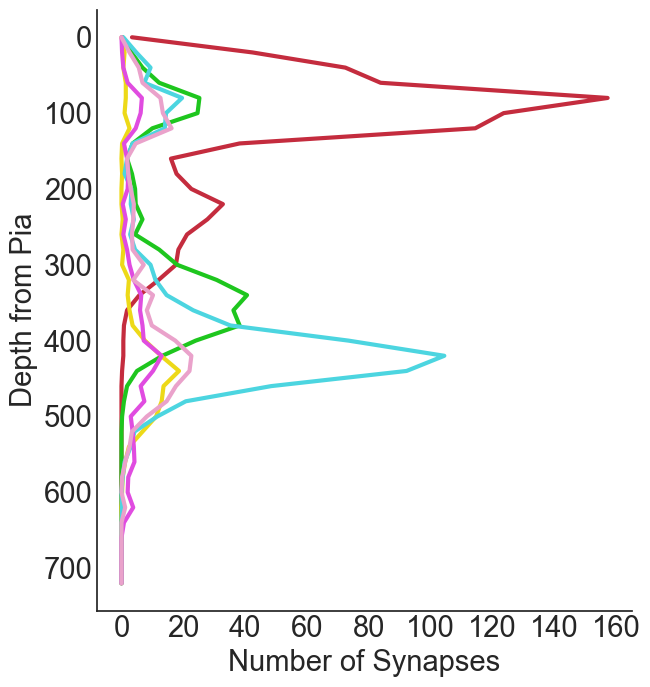

In [7]:
####Met4 avg horizontal histo predicted targets
newall = np.zeros(37, int)
new23 = np.zeros(37, int)
new4 = np.zeros(37, int) 
newit = np.zeros(37, int) 
newpt = np.zeros(37, int)
new6 = np.zeros(37, int) 
newinh = np.zeros(37, int)

met4 =[864691135467660940, 864691136118647832, 864691135013417622, 864691135577202181, 864691135785592004]

for i in met4_id:   
    
    ####Predicted calls
    single_cell = dfm_somas.loc[dfm_somas['pre_pt_root_id'] == i].copy()
    single_cell['y'] = single_cell['ctr_pt_position'].map(lambda x: x[1])
    single_cell['y'] = (single_cell['y']*.004)-300
    single_cell_sub = single_cell[["pre_pt_root_id","post_pt_root_id", "cell_type", "no_of_somas", "size", "y"]].copy()
 
      
    converge = single_cell['post_pt_root_id'].value_counts().rename_axis('post_pt_root_id').reset_index(name ='counts')
    converge_call=pd.merge(single_cell_sub, converge, left_on = 'post_pt_root_id', right_on ='post_pt_root_id', how = 'outer')
    converge_call23 = converge_call.loc[converge_call['cell_type'] == '23P']
    converge_call4 = converge_call.loc[converge_call['cell_type'] == '4P']
    converge_callit = converge_call.loc[converge_call['cell_type'] == '5P-IT']
    converge_callpt = converge_call.loc[converge_call['cell_type'] == '5P-PT']
    converge_call6 = converge_call.loc[(converge_call['cell_type'] == '6P-CT') | (converge_call['cell_type'] == '6P-IT')]
    converge_callinh = converge_call.loc[(converge_call['cell_type'] == 'BC') | (converge_call['cell_type'] == 'BPC') | (converge_call['cell_type'] == 'MC')| (converge_call['cell_type'] == 'NGC')]
    #############  
    
    alltargets = converge_call['y'].to_numpy()
    np23 = converge_call23['y'].to_numpy()
    np4 = converge_call4['y'].to_numpy()
    npit = converge_callit['y'].to_numpy()
    nppt = converge_callpt['y'].to_numpy()
    np6 = converge_call6['y'].to_numpy()
    npinh = converge_callinh['y'].to_numpy()
    
#     historange = np.arange(300,1000,10)
    historange = np.arange(0,750,20)

    histall, bins = np.histogram(alltargets, bins = historange)
    hist23, bins = np.histogram(np23, bins = historange)
    hist4, bins4 = np.histogram(np4, bins = historange)
    histit, bins4 = np.histogram(npit, bins = historange)
    histpt, bins4 = np.histogram(nppt, bins = historange)
    hist6, bins4 = np.histogram(np6, bins = historange)
    histinh, bins4 = np.histogram(npinh, bins = historange)
    
    newall = np.vstack((histall, newall))
    new23 = np.vstack((hist23, new23))
    new4 = np.vstack((hist4, new4))
    newit = np.vstack((histit, newit))
    newpt = np.vstack((histpt, newpt))
    new6 = np.vstack((hist6, new6))
    newinh = np.vstack((histinh, newinh))


##remove empty row for met4 shape
newall = np.delete(newall, 5, 0)
new23 = np.delete(new23, 5, 0)
new4 = np.delete(new4, 5, 0)
newit = np.delete(newit, 5, 0)
newpt = np.delete(newpt, 5, 0)
new6 = np.delete(new6, 5, 0)
newinh = np.delete(newinh, 5, 0)

avgall = np.mean(newall, axis = 0)
avg23 = np.mean(new23, axis = 0)
avg4 = np.mean(new4, axis = 0)
avgit = np.mean(newit, axis = 0)
avgpt = np.mean(newpt, axis = 0)
avg6 = np.mean(new6, axis = 0)
avginh = np.mean(newinh, axis = 0)
bins = np.arange(0, 750, 20)

with plt.style.context('seaborn-white', after_reset = True):

    fig, ax = plt.subplots()
    fig.set_figwidth(6.9)
    fig.set_figheight(7.8)
    
    ax.plot(avg23, bins[:-1], label = "L2/3", color = '#C42C3E', linewidth = 3)
    ax.plot(avg4, bins[:-1], label = "L4", color = '#1EC61E', linewidth = 3)
    ax.plot( avgpt, bins[:-1],label = "L5 ET", color = '#EDD918', linewidth = 3)
    ax.plot( avgit, bins[:-1], label = "L5 IT", color = '#4CD5E0', linewidth = 3)
    ax.plot( avg6,bins[:-1], label = "L6", color = '#E04CE0', linewidth = 3)
    ax.plot( avginh,bins[:-1], label = "INH", color = '#EAA2CB', linewidth = 3)
   
    plt.gca().invert_yaxis()
    ax.set_ylabel('Depth from Pia', fontsize = 21, **afont)
    ax.set_xlabel('Number of Synapses', fontsize = 21, **afont)
    plt.xticks (fontsize =21, **afont)
    plt.yticks (fontsize =21, **afont)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#     plt.savefig('met4_id_syn_hist_pred_targets_wh_muted_arial_bigbatchv1.pdf', bbox_inches = 'tight', transparent = 'True')
    plt.show()


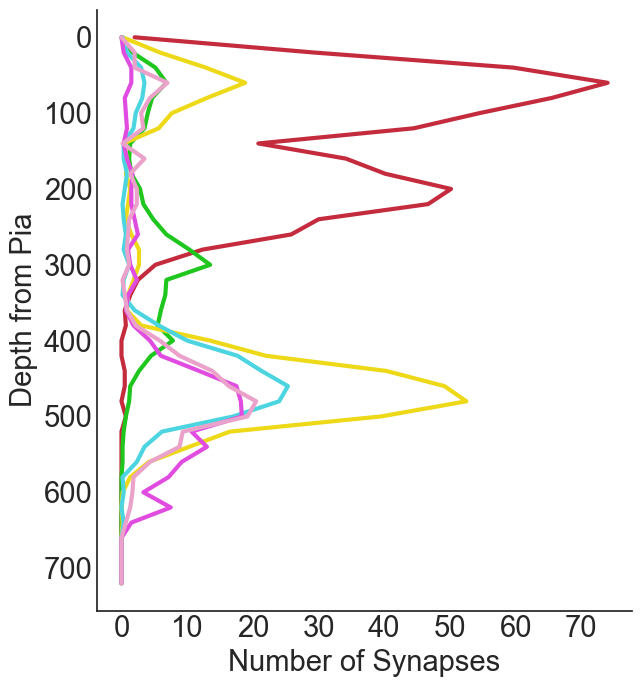

In [9]:
###Pred Met 6 avg horizontal histo predicted targets
newall = np.zeros(37, int)
new23 = np.zeros(37, int)
new4 = np.zeros(37, int) 
newit = np.zeros(37, int) 
newpt = np.zeros(37, int)
new6 = np.zeros(37, int) 
newinh = np.zeros(37, int)



for i in met6_id:  
    
    ###Auto calls
    single_cell = dfm_somas.loc[dfm_somas['pre_pt_root_id'] == i].copy()
    single_cell['y'] = single_cell['ctr_pt_position'].map(lambda x: x[1])
    single_cell['y'] = (single_cell['y']*.004)-300
    single_cell_sub = single_cell[["pre_pt_root_id","post_pt_root_id", "cell_type", "no_of_somas", "size", "y"]].copy()
 
      
    converge = single_cell['post_pt_root_id'].value_counts().rename_axis('post_pt_root_id').reset_index(name ='counts')
    converge_call=pd.merge(single_cell_sub, converge, left_on = 'post_pt_root_id', right_on ='post_pt_root_id', how = 'outer')
    converge_call23 = converge_call.loc[converge_call['cell_type'] == '23P']
    converge_call4 = converge_call.loc[converge_call['cell_type'] == '4P']
    converge_callit = converge_call.loc[converge_call['cell_type'] == '5P-IT']
    converge_callpt = converge_call.loc[converge_call['cell_type'] == '5P-PT']
    converge_call6 = converge_call.loc[(converge_call['cell_type'] == '6P-CT') | (converge_call['cell_type'] == '6P-IT')]
    converge_callinh = converge_call.loc[(converge_call['cell_type'] == 'BC') | (converge_call['cell_type'] == 'BPC') | (converge_call['cell_type'] == 'MC')| (converge_call['cell_type'] == 'NGC')]
       
#     print (converge_call23.head())
    alltargets = converge_call['y'].to_numpy()
    np23 = converge_call23['y'].to_numpy()
    np4 = converge_call4['y'].to_numpy()
    npit = converge_callit['y'].to_numpy()
    nppt = converge_callpt['y'].to_numpy()
    np6 = converge_call6['y'].to_numpy()
    npinh = converge_callinh['y'].to_numpy()
    
    
    historange = np.arange(0,750,20)
    histall, bins = np.histogram(alltargets, bins = historange)
    hist23, bins = np.histogram(np23, bins = historange)
    hist4, bins4 = np.histogram(np4, bins = historange)
    histit, bins4 = np.histogram(npit, bins = historange)
    histpt, bins4 = np.histogram(nppt, bins = historange)
    hist6, bins4 = np.histogram(np6, bins = historange)
    histinh, bins4 = np.histogram(npinh, bins = historange)
    
    newall = np.vstack((histall, newall))
    new23 = np.vstack((hist23, new23))
    new4 = np.vstack((hist4, new4))
    newit = np.vstack((histit, newit))
    newpt = np.vstack((histpt, newpt))
    new6 = np.vstack((hist6, new6))
    newinh = np.vstack((histinh, newinh))


##remove empty row for met6
newall = np.delete(newall, 6, 0)
new23 = np.delete(new23, 6, 0)
new4 = np.delete(new4, 6, 0)
newit = np.delete(newit, 6, 0)
newpt = np.delete(newpt, 6, 0)
new6 = np.delete(new6, 6, 0)
newinh = np.delete(newinh, 6, 0)

### calc avg hist
avgall = np.mean(newall, axis = 0)
avg23 = np.mean(new23, axis = 0)
avg4 = np.mean(new4, axis = 0)
avgit = np.mean(newit, axis = 0)
avgpt = np.mean(newpt, axis = 0)
avg6 = np.mean(new6, axis = 0)
avginh = np.mean(newinh, axis = 0)
bins = np.arange(0, 750, 20)

with plt.style.context('seaborn-white', after_reset = True):
    fig, ax = plt.subplots()
    fig.set_figwidth(6.9)
    fig.set_figheight(7.8)
    
    ax.plot(avg23, bins[:-1], label = "L2/3", color = '#C42C3E', linewidth = 3)
    ax.plot(avg4, bins[:-1], label = "L4", color = '#1EC61E', linewidth = 3)
    ax.plot( avgpt, bins[:-1],label = "L5 ET", color = '#EDD918', linewidth = 3)
    ax.plot( avgit, bins[:-1], label = "L5 IT", color = '#4CD5E0', linewidth = 3)
    ax.plot( avg6,bins[:-1], label = "L6", color = '#E04CE0', linewidth = 3)
    ax.plot( avginh,bins[:-1], label = "INH", color = '#EAA2CB', linewidth = 3)
    plt.gca().invert_yaxis()

#     plt.title('Average Synapse Histogram - Predicted Targets', fontsize = 16, **afont)
    ax.set_ylabel('Depth from Pia', fontsize = 21, **afont)
    ax.set_xlabel('Number of Synapses', fontsize = 21, **afont)
    plt.xticks (fontsize =21, **afont)
    plt.yticks (fontsize =21, **afont)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


#     plt.savefig('Met6_id_syn_hist_pred_targets_wh_muted_arial_bigbatchv1.pdf', bbox_inches = 'tight', transparent = 'True')
    plt.show()

[  0   0  16  56 104 151  75  22  35  38  43  60  53  41  27   6   3   2
   1   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
   0]
[ 7 90 37 14 25  8  9  3 11 51 57 13 10 12  8  2  0  0  0  0  0  0  0  1
  0  1  0  0  0  0  0  0  0  0  0  0  0]
[ 3  6 37 58 51 17  9 14 59 38 21 18 41 24 10  5  5  2  1  2  0  0  1  0
  0  1  0  0  0  0  0  0  0  0  0  0  0]
[  0  13  45  78  92  72 145  26  23  23   5   0   3   3   0   0   0   0
   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
   0]
[ 2 66 76 90 55 51  5 16  8 12 17  8 11 22  9  4  2  1  0  0  0  0  0  2
  0  1  0  0  0  0  0  0  0  0  0  0  0]
[  0   0 147 148  66  28  24  44  69  79 158 181  62  53  20  14   5   3
   1   2   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
   0]


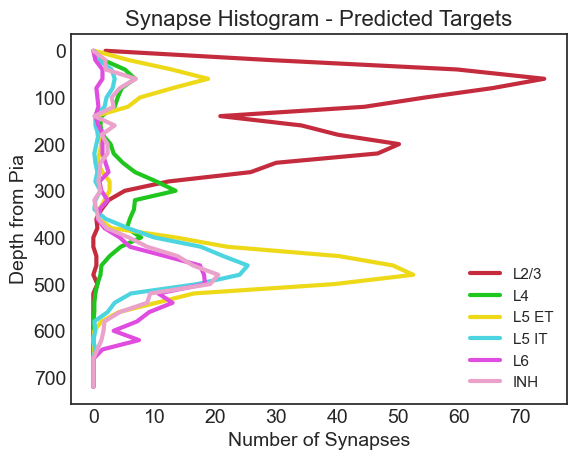

In [17]:
####Met5 shaped avg horizontal histo predicted targets
met5_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_MET-type Label'] == "Sst-MET-5"]
met5_id = met6_pred["id"]
met9_pred = df_ids_pred_met.loc[df_ids_pred_met['predicted_MET-type Label'] == "Sst-MET-9"]
met9_id = met6_pred["id"]

for i in met5_id:   

    
#     ####Predicted calls
    single_cell = dfm_somas.loc[dfm_somas['pre_pt_root_id'] == i].copy()
    single_cell['y'] = single_cell['ctr_pt_position'].map(lambda x: x[1])
    single_cell['y'] = (single_cell['y']*.004)-300
    single_cell_sub = single_cell[["pre_pt_root_id","post_pt_root_id", "cell_type", "no_of_somas", "size", "y"]]
 
    converge = single_cell['post_pt_root_id'].value_counts().rename_axis('post_pt_root_id').reset_index(name ='counts')
    converge_call=pd.merge(single_cell_sub, converge, left_on = 'post_pt_root_id', right_on ='post_pt_root_id', how = 'outer')
#     converge_call = converge_call.drop_duplicates(subset = ['post_pt_root_id'])
#     print (converge_call.sort_values('counts', ascending = False).head())

    converge_call23 = converge_call.loc[converge_call['cell_type'] == '23P']
    converge_call4 = converge_call.loc[converge_call['cell_type'] == '4P']
    converge_callit = converge_call.loc[converge_call['cell_type'] == '5P-IT']
    converge_callpt = converge_call.loc[converge_call['cell_type'] == '5P-PT']
    converge_call6 = converge_call.loc[(converge_call['cell_type'] == '6P-CT') | (converge_call['cell_type'] == '6P-IT')]
    converge_callinh = converge_call.loc[(converge_call['cell_type'] == 'BC') | (converge_call['cell_type'] == 'BPC') | (converge_call['cell_type'] == 'MC')| (converge_call['cell_type'] == 'NGC')]
#############  
    
    #print (converge_callinh.head())
    np23 = converge_call23['y'].to_numpy()
    np4 = converge_call4['y'].to_numpy()
    npit = converge_callit['y'].to_numpy()
    nppt = converge_callpt['y'].to_numpy()
    np6 = converge_call6['y'].to_numpy()
    npinh = converge_callinh['y'].to_numpy()
    
#     historange = np.arange(300,1000,10)
    historange = np.arange(0,750,20)

    hist23, bins = np.histogram(np23, bins = historange)
    hist4, bins4 = np.histogram(np4, bins = historange)
    histit, bins4 = np.histogram(npit, bins = historange)
    histpt, bins4 = np.histogram(nppt, bins = historange)
    hist6, bins4 = np.histogram(np6, bins = historange)
    histinh, bins4 = np.histogram(npinh, bins = historange)
    print (hist23)


bins = np.arange(0, 750, 20)

with plt.style.context('seaborn-white', after_reset = True):

    fig, ax = plt.subplots()
    ax.plot(avg23, bins[:-1], label = "L2/3", color = '#C42C3E', linewidth = 3)
    ax.plot(avg4, bins[:-1], label = "L4", color = '#1EC61E', linewidth = 3)
    ax.plot( avgpt, bins[:-1],label = "L5 ET", color = '#EDD918', linewidth = 3)
    ax.plot( avgit, bins[:-1], label = "L5 IT", color = '#4CD5E0', linewidth = 3)
    ax.plot( avg6,bins[:-1], label = "L6", color = '#E04CE0', linewidth = 3)
    ax.plot( avginh,bins[:-1], label = "INH", color = '#EAA2CB', linewidth = 3)
    plt.gca().invert_yaxis()
    ax.set_ylabel('Depth from Pia', fontsize = 14, **afont)
    ax.set_xlabel('Number of Synapses', fontsize = 14, **afont)
    plt.xticks (fontsize =14, **afont)
    plt.yticks (fontsize =14, **afont)
    plt.legend(prop = {'family':'Arial', 'size': 11}, loc = 'lower right')
#     plt.legend(prop = {'family':'Arial', 'size': 11}, loc = 'upper right')
    # #
#     plt.title('Average Synapse Histogram - Manual Targets', fontsize = 16, **afont)
#     plt.savefig('met5_syn_hist_man_targets_wh_green_arial.png')
    plt.title('Synapse Histogram - Predicted Targets', fontsize = 16, **afont)
#     plt.savefig('CG_met5_syn_hist_pred_targets_wh_green_arial.pdf')
    plt.show()
